In [58]:
#imports
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model



In [59]:
#OBTER OS DADOS
raw_data = pd.read_csv('breast-cancer-wisconsin.data',header=0,na_values=['?'])

#REMOVER LINHAS COM VALORES INVÁLIDOS
raw_data=raw_data.dropna()
#raw_input_data.fillna(0,inplace = True)
#print(raw_input_data.head(25))

#DIVIDIR DADOS ENTRE ENTRADA E SAÍDA
raw_input_data = raw_data.iloc[:,1:9]
raw_output_data = raw_data.iloc[:,10]

#TROCA SAIDAS 2 E 4 POR 0 E 1
raw_output_data.replace([2, 4], [0, 1],inplace = True)


In [60]:
#FUNÇÕES DE VISUALIZAÇÃO
def plot_acc(data):
    plt.plot(data.history['acc'])
    plt.plot(data.history['val_acc'])
    plt.title('Precisão do Modelo')
    plt.ylabel('Precisão')
    plt.xlabel('Época')
    plt.legend(['Treinamento', 'Validação'], loc='upper left')
    plt.show()
    
def plot_loss(data):
    plt.plot(data.history['loss'])
    plt.plot(data.history['val_loss'])
    plt.title('Erro Médio Quadrático')
    plt.ylabel('Custo')
    plt.xlabel('Época')
    plt.legend(['Treinamento', 'Validação'], loc='upper left')
    plt.show()
    


In [61]:
#DIVIDE E NORMALIZA OS DADOS

x_train, x_validate, y_train, y_validate = train_test_split(raw_input_data,raw_output_data, test_size=0.5, shuffle= True)


#transforma os datasets em arrays
x_train = np.array(x_train.values)
y_train = np.array(y_train.values)

x_validate = np.array(x_validate.values)
y_validate = np.array(y_validate.values)

#normaliza os dados (dados já estao normalizados, entao acho que nao é necessario)
#x_train = tf.keras.utils.normalize(x_train,axis=1)
#x_test= tf.keras.utils.normalize(x_test,axis=1)


In [78]:
model = tf.keras.models.Sequential()

#CAMADA DE ENTRADA (9 ENTRADAS), FUNÇÃO DE ATIVAÇÃO SIGMOID
model.add(tf.keras.layers.Dense(9,kernel_initializer='random_uniform',
                bias_initializer='zeros', activation=tf.nn.sigmoid))

#CAMADA OCULTA #1  (9 NEURONIOS), FUNÇAO DE ATIVAÇÃO SIGMOID
model.add(tf.keras.layers.Dense(5,kernel_initializer='random_uniform',
                bias_initializer='zeros', activation=tf.nn.sigmoid))

#CAMADA DE SAÍDA (1 NEURONIO), FUNÇAO DE ATIVAÇÃO sigmoid
model.add(tf.keras.layers.Dense(1,activation=tf.nn.sigmoid))

In [79]:
model.compile(optimizer='adam',loss='mean_squared_error', metrics = ['accuracy'])

In [80]:
history = model.fit(x_train,y_train, validation_split=0.2, verbose = 1, epochs=300)

Train on 272 samples, validate on 69 samples
Epoch 1/300
272/272 [==============================] - 0s 612us/sample - loss: 0.2253 - acc: 0.6654 - val_loss: 0.2206 - val_acc: 0.6812
Epoch 2/300
272/272 [==============================] - 0s 58us/sample - loss: 0.2240 - acc: 0.6654 - val_loss: 0.2192 - val_acc: 0.6812
Epoch 3/300
272/272 [==============================] - 0s 63us/sample - loss: 0.2227 - acc: 0.6654 - val_loss: 0.2179 - val_acc: 0.6812
Epoch 4/300
272/272 [==============================] - 0s 58us/sample - loss: 0.2217 - acc: 0.6654 - val_loss: 0.2166 - val_acc: 0.6812
Epoch 5/300
272/272 [==============================] - 0s 59us/sample - loss: 0.2205 - acc: 0.6654 - val_loss: 0.2153 - val_acc: 0.6812
Epoch 6/300
272/272 [==============================] - 0s 62us/sample - loss: 0.2194 - acc: 0.6654 - val_loss: 0.2139 - val_acc: 0.6812
Epoch 7/300
272/272 [==============================] - 0s 65us/sample - loss: 0.2180 - acc: 0.6654 - val_loss: 0.2126 - val_acc: 0.6812
Ep

272/272 [==============================] - 0s 49us/sample - loss: 0.0846 - acc: 0.9485 - val_loss: 0.0771 - val_acc: 0.9565
Epoch 61/300
272/272 [==============================] - 0s 49us/sample - loss: 0.0832 - acc: 0.9485 - val_loss: 0.0755 - val_acc: 0.9565
Epoch 62/300
272/272 [==============================] - 0s 55us/sample - loss: 0.0819 - acc: 0.9485 - val_loss: 0.0741 - val_acc: 0.9565
Epoch 63/300
272/272 [==============================] - 0s 49us/sample - loss: 0.0806 - acc: 0.9485 - val_loss: 0.0727 - val_acc: 0.9565
Epoch 64/300
272/272 [==============================] - 0s 53us/sample - loss: 0.0794 - acc: 0.9485 - val_loss: 0.0712 - val_acc: 0.9565
Epoch 65/300
272/272 [==============================] - ETA: 0s - loss: 0.0815 - acc: 0.937 - 0s 55us/sample - loss: 0.0781 - acc: 0.9485 - val_loss: 0.0700 - val_acc: 0.9565
Epoch 66/300
272/272 [==============================] - 0s 53us/sample - loss: 0.0769 - acc: 0.9485 - val_loss: 0.0687 - val_acc: 0.9710
Epoch 67/300
272

272/272 [==============================] - 0s 52us/sample - loss: 0.0461 - acc: 0.9522 - val_loss: 0.0340 - val_acc: 0.9710
Epoch 120/300
272/272 [==============================] - 0s 53us/sample - loss: 0.0459 - acc: 0.9522 - val_loss: 0.0339 - val_acc: 0.9710
Epoch 121/300
272/272 [==============================] - 0s 50us/sample - loss: 0.0455 - acc: 0.9522 - val_loss: 0.0335 - val_acc: 0.9710
Epoch 122/300
272/272 [==============================] - 0s 53us/sample - loss: 0.0452 - acc: 0.9522 - val_loss: 0.0333 - val_acc: 0.9710
Epoch 123/300
272/272 [==============================] - 0s 79us/sample - loss: 0.0452 - acc: 0.9559 - val_loss: 0.0336 - val_acc: 0.9710
Epoch 124/300
272/272 [==============================] - 0s 59us/sample - loss: 0.0448 - acc: 0.9559 - val_loss: 0.0329 - val_acc: 0.9710
Epoch 125/300
272/272 [==============================] - 0s 55us/sample - loss: 0.0444 - acc: 0.9522 - val_loss: 0.0327 - val_acc: 0.9710
Epoch 126/300
272/272 [=========================

272/272 [==============================] - 0s 53us/sample - loss: 0.0340 - acc: 0.9669 - val_loss: 0.0269 - val_acc: 0.9710
Epoch 179/300
272/272 [==============================] - 0s 59us/sample - loss: 0.0337 - acc: 0.9669 - val_loss: 0.0264 - val_acc: 0.9710
Epoch 180/300
272/272 [==============================] - 0s 69us/sample - loss: 0.0336 - acc: 0.9669 - val_loss: 0.0261 - val_acc: 0.9710
Epoch 181/300
272/272 [==============================] - 0s 52us/sample - loss: 0.0335 - acc: 0.9632 - val_loss: 0.0260 - val_acc: 0.9710
Epoch 182/300
272/272 [==============================] - 0s 57us/sample - loss: 0.0332 - acc: 0.9669 - val_loss: 0.0261 - val_acc: 0.9710
Epoch 183/300
272/272 [==============================] - 0s 67us/sample - loss: 0.0332 - acc: 0.9669 - val_loss: 0.0262 - val_acc: 0.9710
Epoch 184/300
272/272 [==============================] - 0s 58us/sample - loss: 0.0330 - acc: 0.9669 - val_loss: 0.0262 - val_acc: 0.9710
Epoch 185/300
272/272 [=========================

272/272 [==============================] - 0s 57us/sample - loss: 0.0274 - acc: 0.9669 - val_loss: 0.0229 - val_acc: 0.9710
Epoch 238/300
272/272 [==============================] - 0s 49us/sample - loss: 0.0275 - acc: 0.9669 - val_loss: 0.0224 - val_acc: 0.9710
Epoch 239/300
272/272 [==============================] - 0s 63us/sample - loss: 0.0270 - acc: 0.9669 - val_loss: 0.0227 - val_acc: 0.9710
Epoch 240/300
272/272 [==============================] - 0s 55us/sample - loss: 0.0269 - acc: 0.9669 - val_loss: 0.0227 - val_acc: 0.9710
Epoch 241/300
272/272 [==============================] - 0s 61us/sample - loss: 0.0268 - acc: 0.9706 - val_loss: 0.0227 - val_acc: 0.9710
Epoch 242/300
272/272 [==============================] - 0s 66us/sample - loss: 0.0268 - acc: 0.9669 - val_loss: 0.0225 - val_acc: 0.9710
Epoch 243/300
272/272 [==============================] - 0s 60us/sample - loss: 0.0267 - acc: 0.9706 - val_loss: 0.0227 - val_acc: 0.9710
Epoch 244/300
272/272 [=========================

272/272 [==============================] - 0s 54us/sample - loss: 0.0230 - acc: 0.9779 - val_loss: 0.0204 - val_acc: 0.9710
Epoch 297/300
272/272 [==============================] - 0s 45us/sample - loss: 0.0230 - acc: 0.9743 - val_loss: 0.0202 - val_acc: 0.9710
Epoch 298/300
272/272 [==============================] - 0s 56us/sample - loss: 0.0229 - acc: 0.9779 - val_loss: 0.0206 - val_acc: 0.9710
Epoch 299/300
272/272 [==============================] - 0s 55us/sample - loss: 0.0229 - acc: 0.9779 - val_loss: 0.0204 - val_acc: 0.9710
Epoch 300/300
272/272 [==============================] - 0s 67us/sample - loss: 0.0229 - acc: 0.9779 - val_loss: 0.0206 - val_acc: 0.9710


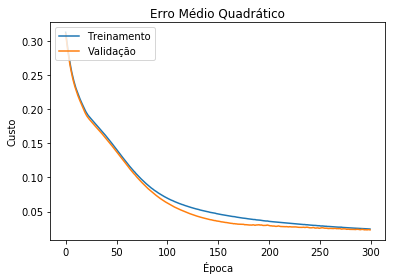

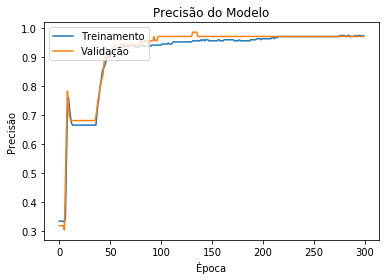

In [65]:
plot_loss(history)
plot_acc(history)
#plot_model(model, to_file='asdf.png',show_shapes=True,show_layer_names=True)

In [71]:
custo_val, acc_val = model.evaluate(x_validate, y_validate)
predictions = model.predict([x_validate])
predictions = (predictions > 0.5).astype(np.int)
print(confusion_matrix(y_validate, predictions))

342/342 [==============================] - 0s 25us/sample - loss: 0.0244 - acc: 0.9737
[[209   7]
 [  2 124]]


In [70]:

print("VALORES ESTIMADOS:")
print(predictions[1:20].T)
print()
print("VALORES REAIS")
print(y_validate[1:20])

VALORES ESTIMADOS:
[[1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0]]

VALORES REAIS
[0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0]


In [85]:
weights = model.layers[0].get_weights()[0]
biases = model.layers[0].get_weights()[1]
#print(weights)
#print(biases)